## This file is how I imputed and verified the data

Imports

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


Loading in the data and checking nulls

In [34]:
df = pd.read_csv("data.csv")
df["fear_greed_value_feargreed"].isnull().sum()

1861

In [9]:
df

,date,time,AdrActCnt_coinmetrics,AdrBal1in100KCnt_coinmetrics,AdrBal1in100MCnt_coinmetrics,AdrBal1in10BCnt_coinmetrics,AdrBal1in10KCnt_coinmetrics,AdrBal1in10MCnt_coinmetrics,AdrBal1in1BCnt_coinmetrics,AdrBal1in1KCnt_coinmetrics,...,DEXCAUS_Value_fred,DTWEXAFEGS_Value_fred,DTWEXEMEGS_Value_fred,DCOILWTICO_Value_fred,DCOILBRENTEU_Value_fred,DHHNGSP_Value_fred,CBBTCUSD_Value_fred,CBETHUSD_Value_fred,fear_greed_original,fear_greed_imputed
0,2013-01-01,2013-01-01 00:00:00+00:00,38733.0,9202.0,214064.0,457546.0,956.0,135772.0,334201.0,64.0,...,0.9958,87.8285,95.5580,91.83,110.80,3.43,NaN,NaN,NaN,31.6425
1,2013-01-02,2013-01-02 00:00:00+00:00,40911.0,9173.0,214383.0,460400.0,956.0,136091.0,334729.0,64.0,...,0.9859,87.5801,95.0113,93.14,112.98,3.30,NaN,NaN,NaN,32.6525
2,2013-01-03,2013-01-03 00:00:00+00:00,52539.0,9208.0,214837.0,465582.0,952.0,136229.0,335388.0,64.0,...,0.9853,87.8197,94.9935,92.97,113.03,3.19,NaN,NaN,NaN,32.0550
3,2013-01-04,2013-01-04 00:00:00+00:00,46781.0,9223.0,214655.0,468186.0,952.0,135990.0,335305.0,64.0,...,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN,NaN,32.4500
4,2013-01-05,2013-01-05 00:00:00+00:00,53959.0,9269.0,214591.0,473662.0,957.0,135647.0,336130.0,64.0,...,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN,NaN,27.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,2025-06-27,2025-06-27 00:00:00+00:00,731987.0,11570.0,2957354.0,19872320.0,882.0,528384.0,9287554.0,48.0,...,1.3666,110.3921,131.8250,66.66,69.37,3.23,107352.20,2437.08,65.0,65.0000
4561,2025-06-28,2025-06-28 00:00:00+00:00,636115.0,11571.0,2957212.0,19868838.0,882.0,528377.0,9286571.0,48.0,...,1.3666,110.3921,131.8250,66.66,69.37,3.23,108386.44,2500.69,65.0,65.0000
4562,2025-06-29,2025-06-29 00:00:00+00:00,545712.0,11572.0,2957163.0,19872013.0,882.0,528462.0,9286340.0,47.0,...,1.3666,110.3921,131.8250,66.66,69.37,3.23,107173.21,2486.15,68.0,68.0000
4563,2025-06-30,2025-06-30 00:00:00+00:00,759866.0,11589.0,2957371.0,19872949.0,883.0,528557.0,9287687.0,46.0,...,1.3620,110.0028,131.7243,66.30,68.15,3.26,105711.78,2405.32,66.0,66.0000


What % are nulls and where are they?

In [3]:
df["fear_greed_value_feargreed"].isna().mean()

0.4076670317634173

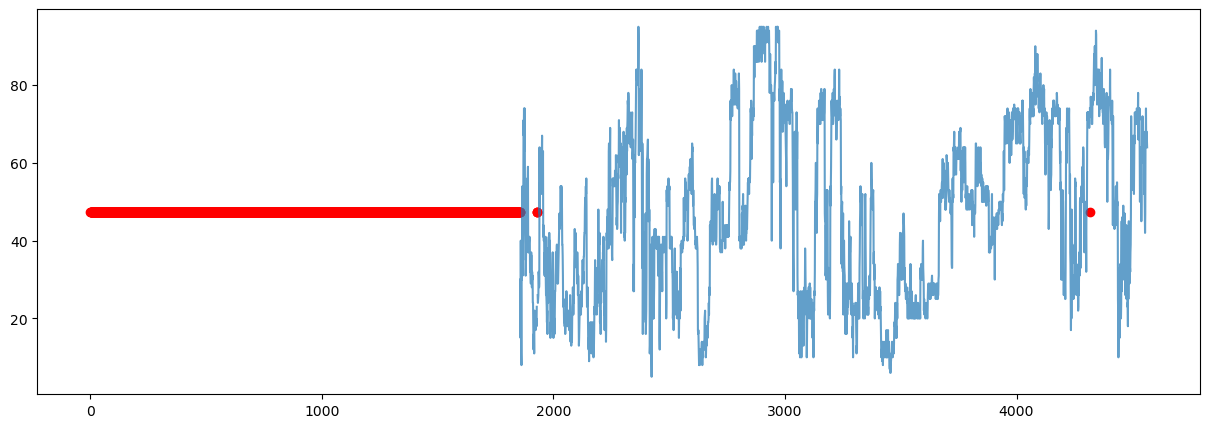

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df['fear_greed_value_feargreed'], alpha=0.7)
plt.scatter(df.index[df['fear_greed_value_feargreed'].isna()],
            [df['fear_greed_value_feargreed'].mean()] * df['fear_greed_value_feargreed'].isna().sum(),
            color='red')


## MICE imputation

In [12]:
df

,time,AdrActCnt_coinmetrics,AdrBal1in100KCnt_coinmetrics,AdrBal1in100MCnt_coinmetrics,AdrBal1in10BCnt_coinmetrics,AdrBal1in10KCnt_coinmetrics,AdrBal1in10MCnt_coinmetrics,AdrBal1in1BCnt_coinmetrics,AdrBal1in1KCnt_coinmetrics,AdrBal1in1MCnt_coinmetrics,...,DEXJPUS_Value_fred,DEXUSUK_Value_fred,DEXCAUS_Value_fred,DTWEXAFEGS_Value_fred,DTWEXEMEGS_Value_fred,DCOILWTICO_Value_fred,DCOILBRENTEU_Value_fred,DHHNGSP_Value_fred,CBBTCUSD_Value_fred,CBETHUSD_Value_fred
0,2013-01-01 00:00:00+00:00,38733.0,9202.0,214064.0,457546.0,956.0,135772.0,334201.0,64.0,82352.0,...,86.64,1.6262,0.9958,87.8285,95.5580,91.83,110.80,3.43,NaN,NaN
1,2013-01-02 00:00:00+00:00,40911.0,9173.0,214383.0,460400.0,956.0,136091.0,334729.0,64.0,82500.0,...,87.10,1.6255,0.9859,87.5801,95.0113,93.14,112.98,3.30,NaN,NaN
2,2013-01-03 00:00:00+00:00,52539.0,9208.0,214837.0,465582.0,952.0,136229.0,335388.0,64.0,82595.0,...,86.92,1.6151,0.9853,87.8197,94.9935,92.97,113.03,3.19,NaN,NaN
3,2013-01-04 00:00:00+00:00,46781.0,9223.0,214655.0,468186.0,952.0,135990.0,335305.0,64.0,82310.0,...,88.14,1.6036,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN
4,2013-01-05 00:00:00+00:00,53959.0,9269.0,214591.0,473662.0,957.0,135647.0,336130.0,64.0,82092.0,...,88.14,1.6036,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,2025-06-27 00:00:00+00:00,731987.0,11570.0,2957354.0,19872320.0,882.0,528384.0,9287554.0,48.0,100742.0,...,144.74,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,107352.20,2437.08
4561,2025-06-28 00:00:00+00:00,636115.0,11571.0,2957212.0,19868838.0,882.0,528377.0,9286571.0,48.0,100756.0,...,144.74,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,108386.44,2500.69
4562,2025-06-29 00:00:00+00:00,545712.0,11572.0,2957163.0,19872013.0,882.0,528462.0,9286340.0,47.0,100781.0,...,144.74,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,107173.21,2486.15
4563,2025-06-30 00:00:00+00:00,759866.0,11589.0,2957371.0,19872949.0,883.0,528557.0,9287687.0,46.0,100848.0,...,144.17,1.3722,1.3620,110.0028,131.7243,66.30,68.15,3.26,105711.78,2405.32


Defining target variable

In [4]:
# rename this to your actual F&G column name
target_col = "fear_greed"

if "fear_greed_value_feargreed" not in df.columns:
    df["fear_greed_original"] = df[target_col]

Examining correlations between features and target variables and dropping any < 0.30

In [5]:
target = "fear_greed_value_feargreed"

# Keep only numeric columns
num_df = df.select_dtypes(include="number")

corr = num_df.corr()[target].abs().sort_values(ascending=False)

# Remove the target itself
corr = corr.drop(target)

# Select top predictors based on correlation threshold
stage1_features = corr[corr > 0.3].index.tolist()  # keep r > 0.1

print("Stage 1 selected:", len(stage1_features))
stage1_features[:20]


Stage 1 selected: 115


['ROI30d_coinmetrics',
 'CapMVRVCur_coinmetrics',
 'NVTAdjFF90_coinmetrics',
 'CapMVRVFF_coinmetrics',
 'NVTAdj90_coinmetrics',
 'BlkWghtTot_coinmetrics',
 'BlkWghtMean_coinmetrics',
 'RevUSD_coinmetrics',
 'TxTfrCnt_coinmetrics',
 'AMZN_Low_yfinance',
 'AMZN_Close_yfinance',
 'AMZN_Open_yfinance',
 'VelCur1yr_coinmetrics',
 'AMZN_High_yfinance',
 'IssContUSD_coinmetrics',
 'IssTotUSD_coinmetrics',
 'BlkSizeMeanByte_coinmetrics',
 'AdrBalUSD100KCnt_coinmetrics',
 'SLV_Close_yfinance',
 'SLV_High_yfinance']

Of the remaining features, use a Random Forest regressor to take the top half based on feature importances

In [ ]:
target = "fear_greed_value_feargreed"
mask = df[target].notna()

X = df.loc[mask, stage1_features]   # use your 115 features
y = df.loc[mask, target]

rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)

rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=stage1_features)
importances = importances.sort_values(ascending=False)

# Keep features above the median importance
threshold = importances.median()
stage2_features = importances[importances > threshold].index.tolist()

print("Stage 2 selected:", len(stage2_features))
stage2_features[:20]


Stage 2 selected: 57


['NVTAdj90_coinmetrics',
 'CapMVRVFF_coinmetrics',
 'ROI30d_coinmetrics',
 'SplyAdrTop100_coinmetrics',
 'CapMrktEstUSD_coinmetrics',
 'SplyAct2yr_coinmetrics',
 'SplyAdrBal1in1K_coinmetrics',
 'DHHNGSP_Value_fred',
 'CapMVRVCur_coinmetrics',
 'BTC-USD_Open_yfinance',
 'VelCur1yr_coinmetrics',
 'FeeTotUSD_coinmetrics',
 'NVTAdjFF90_coinmetrics',
 'BAMLC0A0CM_Value_fred',
 'FeeTotNtv_coinmetrics',
 'FeeMedUSD_coinmetrics',
 'VtyDayRet180d_coinmetrics',
 'TxTfrValMeanNtv_coinmetrics',
 'AdrBal1in10MCnt_coinmetrics',
 'VIXCLS_Value_fred']

Take VIF scores of the remaining 57 features and only keep those with VIF < 10.

In [ ]:
X2 = df.loc[mask, stage2_features].dropna()

vif_df = pd.DataFrame()
vif_df["feature"] = X2.columns
vif_df["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_df = vif_df.sort_values("VIF", ascending=False)

vif_df


,feature,VIF
20,^VIX_Close_yfinance,9777.151810
19,VIXCLS_Value_fred,9717.354188
0,NVTAdj90_coinmetrics,7800.181195
12,NVTAdjFF90_coinmetrics,6715.744567
1,CapMVRVFF_coinmetrics,5264.068549
8,CapMVRVCur_coinmetrics,5126.486644
4,CapMrktEstUSD_coinmetrics,3701.283447
26,BTC-USD_High_yfinance,3549.565305
25,EEM_High_yfinance,3276.726610
48,EFA_High_yfinance,3130.119009


In [9]:
final_features = vif_df[vif_df["VIF"] < 10]["feature"].tolist()
print(final_features)
print(len(final_features))


['BlkWghtTot_coinmetrics', 'AdrActCnt_coinmetrics', 'BlkWghtMean_coinmetrics', 'SPY_Volume_yfinance', 'FlowInExUSD_coinmetrics', 'VtyDayRet180d_coinmetrics', 'EFA_Volume_yfinance', 'TxTfrValAdjNtv_coinmetrics', 'EEM_Volume_yfinance', 'BTC-USD_Volume_yfinance', 'DHHNGSP_Value_fred', 'FlowTfrFromExCnt_coinmetrics', 'ROI30d_coinmetrics', 'TxTfrValMeanNtv_coinmetrics']
14


Testing the imputer on a known subset of data

In [ ]:
target_col = "fear_greed_value_feargreed"


# 1) Only rows where F&G is observed
df_known = df[df[target_col].notna()].copy()

# 2) Restrict to rows where at least some predictors exist
df_known = df_known[[target_col] + final_features]

# optional: drop rows where all predictors are NaN
df_known = df_known.dropna(subset=final_features, how="all")

print("Rows with fully known F&G subset:", len(df_known))

np.random.seed(42)

all_idx = df_known.index.to_numpy()
test_idx = np.random.choice(all_idx, size=int(0.10 * len(all_idx)), replace=False)

# Save ground truth
y_true = df_known.loc[test_idx, target_col].copy()

# Mask them in the copy
df_known.loc[test_idx, target_col] = np.nan



impute_cols = [target_col] + final_features
X_imp = df_known[impute_cols].copy()

base_estimator = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None,
)

imputer = IterativeImputer(
    estimator=base_estimator,
    max_iter=10,
    sample_posterior=False,
    initial_strategy="median",
    random_state=42,
)

imputed_array = imputer.fit_transform(X_imp)

df_known_imputed = pd.DataFrame(
    imputed_array,
    index=df_known.index,
    columns=impute_cols,
)



Rows with fully known F&G subset: 2704


How did we do?

In [ ]:
y_pred = df_known_imputed.loc[test_idx, target_col]

# Align and drop any accidental NaNs
common_index = y_true.index.intersection(y_pred.index)
yt = y_true.loc[common_index]
yp = y_pred.loc[common_index]

valid_mask = (~yt.isna()) & (~yp.isna())
print("Total test points:", len(common_index))
print("Valid (non-NaN) points:", valid_mask.sum())

yt_valid = yt[valid_mask]
yp_valid = yp[valid_mask]

mae = mean_absolute_error(yt_valid, yp_valid)
rmse = np.sqrt(mean_squared_error(yt_valid, yp_valid))
r2 = r2_score(yt_valid, yp_valid)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Total test points: 270
Valid (non-NaN) points: 270
MAE: 6.552675925925926
RMSE: 9.050599756318588
R²: 0.8358247095035855


Lets implement it for real

In [ ]:
target = "fear_greed_value_feargreed"

# Save original values
df["fear_greed_original"] = df[target]


impute_cols = [target] + final_features
df_imp = df[impute_cols].copy()

base_estimator = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)

imputer = IterativeImputer(
    estimator=base_estimator,
    max_iter=10,
    sample_posterior=False,
    initial_strategy="median",
    random_state=42
)

imputed_array = imputer.fit_transform(df_imp)

df_imputed = pd.DataFrame(imputed_array, index=df.index, columns=impute_cols)

In [36]:
df_imputed

,fear_greed_value_feargreed,BlkWghtTot_coinmetrics,AdrActCnt_coinmetrics,BlkWghtMean_coinmetrics,SPY_Volume_yfinance,FlowInExUSD_coinmetrics,VtyDayRet180d_coinmetrics,EFA_Volume_yfinance,TxTfrValAdjNtv_coinmetrics,EEM_Volume_yfinance,BTC-USD_Volume_yfinance,DHHNGSP_Value_fred,FlowTfrFromExCnt_coinmetrics,ROI30d_coinmetrics,TxTfrValMeanNtv_coinmetrics
0,32.2625,58968828.0,38733.0,3.640051e+05,243935200.0,2.699913e+04,0.042378,22820800.0,333680.324812,4.935380e+07,1.842353e+07,3.43,141.0,6.668510,20.422442
1,32.0650,67771808.0,40911.0,4.429530e+05,192059000.0,8.282026e+04,0.042381,26056300.0,379142.302550,1.011851e+08,1.919909e+07,3.30,225.0,4.927321,19.594823
2,27.5700,72098604.0,52539.0,4.450531e+05,144761800.0,9.863871e+04,0.042365,23239700.0,317078.043610,6.621780e+07,1.730616e+07,3.19,233.0,0.108392,18.413197
3,29.0025,85389900.0,46781.0,5.581039e+05,116817700.0,1.048111e+05,0.042363,15522200.0,393007.570399,5.108700e+07,1.694627e+07,3.20,246.0,1.043893,22.764338
4,28.2025,66902508.0,53959.0,4.744859e+05,140236392.5,1.513928e+05,0.042302,21705223.0,327154.202796,5.693880e+07,1.738383e+07,3.20,261.0,-0.137393,23.200805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,65.0000,459314298.0,731987.0,3.994037e+06,86258400.0,2.843598e+09,0.024711,15987700.0,141129.480083,3.759340e+07,4.535369e+10,3.23,31650.0,-0.745577,0.338004
4561,65.0000,567011518.0,636115.0,3.910424e+06,86258400.0,1.548053e+09,0.024698,15987700.0,50219.364539,3.759340e+07,3.003771e+10,3.23,24276.0,1.536568,0.108523
4562,68.0000,479140439.0,545712.0,2.835151e+06,86258400.0,1.022783e+09,0.024698,15987700.0,47060.432535,3.759340e+07,3.553487e+10,3.23,24055.0,4.211910,0.101114
4563,66.0000,507340315.0,759866.0,3.498899e+06,92502500.0,1.800318e+09,0.024701,28062100.0,134664.360199,3.296630e+07,4.206480e+10,3.26,35222.0,2.334219,0.332201


moving the imputed column to the end

In [37]:
imputed_col = f"{target}_imputed"

# imputed_array[:, 0] corresponds to the target column because target is first in impute_cols
df[imputed_col] = pd.Series(imputed_array[:, 0], index=df_imp.index)

# force it to the end
df[imputed_col] = df.pop(imputed_col)


Adding a date column to the front and saving the imputed dataset

In [54]:
df["date"] = pd.to_datetime(df["time"]).dt.date
df.insert(0, "date", df.pop("date"))
df.to_csv("f&g_imputed_2.csv", index=False)
# df.drop(columns=["date"], inplace=True)

In [55]:
df

,date,time,AdrActCnt_coinmetrics,AdrBal1in100KCnt_coinmetrics,AdrBal1in100MCnt_coinmetrics,AdrBal1in10BCnt_coinmetrics,AdrBal1in10KCnt_coinmetrics,AdrBal1in10MCnt_coinmetrics,AdrBal1in1BCnt_coinmetrics,AdrBal1in1KCnt_coinmetrics,...,DEXUSUK_Value_fred,DEXCAUS_Value_fred,DTWEXAFEGS_Value_fred,DTWEXEMEGS_Value_fred,DCOILWTICO_Value_fred,DCOILBRENTEU_Value_fred,DHHNGSP_Value_fred,CBBTCUSD_Value_fred,CBETHUSD_Value_fred,fear_greed_value_feargreed_imputed
0,2013-01-01,2013-01-01 00:00:00+00:00,38733.0,9202.0,214064.0,457546.0,956.0,135772.0,334201.0,64.0,...,1.6262,0.9958,87.8285,95.5580,91.83,110.80,3.43,NaN,NaN,32.2625
1,2013-01-02,2013-01-02 00:00:00+00:00,40911.0,9173.0,214383.0,460400.0,956.0,136091.0,334729.0,64.0,...,1.6255,0.9859,87.5801,95.0113,93.14,112.98,3.30,NaN,NaN,32.0650
2,2013-01-03,2013-01-03 00:00:00+00:00,52539.0,9208.0,214837.0,465582.0,952.0,136229.0,335388.0,64.0,...,1.6151,0.9853,87.8197,94.9935,92.97,113.03,3.19,NaN,NaN,27.5700
3,2013-01-04,2013-01-04 00:00:00+00:00,46781.0,9223.0,214655.0,468186.0,952.0,135990.0,335305.0,64.0,...,1.6036,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN,29.0025
4,2013-01-05,2013-01-05 00:00:00+00:00,53959.0,9269.0,214591.0,473662.0,957.0,135647.0,336130.0,64.0,...,1.6036,0.9856,88.2579,95.1320,93.12,112.58,3.20,NaN,NaN,28.2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,2025-06-27,2025-06-27 00:00:00+00:00,731987.0,11570.0,2957354.0,19872320.0,882.0,528384.0,9287554.0,48.0,...,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,107352.20,2437.08,65.0000
4561,2025-06-28,2025-06-28 00:00:00+00:00,636115.0,11571.0,2957212.0,19868838.0,882.0,528377.0,9286571.0,48.0,...,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,108386.44,2500.69,65.0000
4562,2025-06-29,2025-06-29 00:00:00+00:00,545712.0,11572.0,2957163.0,19872013.0,882.0,528462.0,9286340.0,47.0,...,1.3720,1.3666,110.3921,131.8250,66.66,69.37,3.23,107173.21,2486.15,68.0000
4563,2025-06-30,2025-06-30 00:00:00+00:00,759866.0,11589.0,2957371.0,19872949.0,883.0,528557.0,9287687.0,46.0,...,1.3722,1.3620,110.0028,131.7243,66.30,68.15,3.26,105711.78,2405.32,66.0000


How did we do?

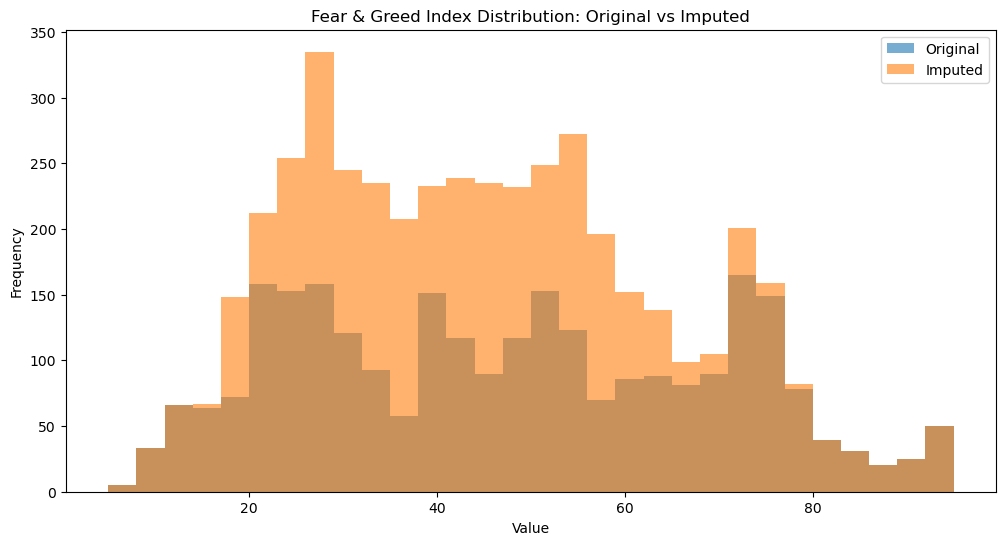

In [ ]:
df["fear_greed_imputed"] = df_imputed[target]

plt.figure(figsize=(12,6))

plt.hist(df["fear_greed_value_feargreed"].dropna(), bins=30, alpha=0.6, label="Original")
plt.hist(df["fear_greed_value_feargreed_imputed"], bins=30, alpha=0.6, label="Imputed")

plt.legend()
plt.title("Fear & Greed Index Distribution: Original vs Imputed")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()


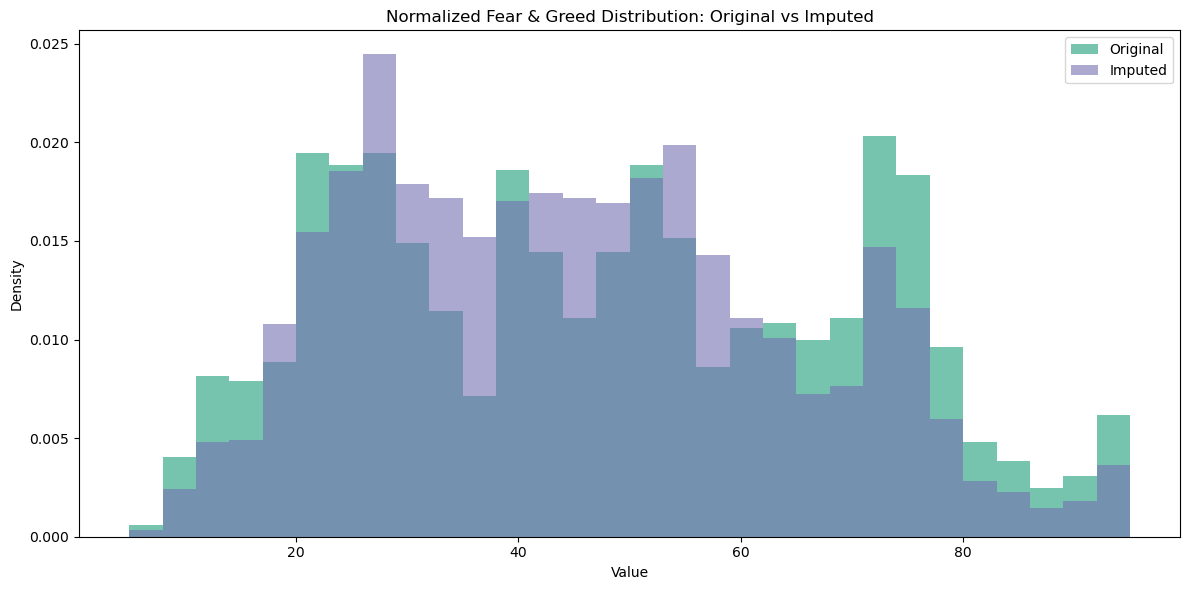

In [72]:
plt.figure(figsize=(12, 6))

plt.hist(
    df["fear_greed_value_feargreed"].dropna(),
    bins=30,
    density=True,
    alpha=0.6,
    label="Original",
    color="#1B9E77"   # blue
)

plt.hist(
    df["fear_greed_value_feargreed_imputed"],
    bins=30,
    density=True,
    alpha=0.6,
    label="Imputed",
    color="#7570B3"   # orange
)

plt.legend()
plt.title("Normalized Fear & Greed Distribution: Original vs Imputed")
plt.xlabel("Value")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


Comparing distributions

In [37]:
df[["fear_greed_original", "fear_greed_imputed"]].describe()


,fear_greed_original,fear_greed_imputed
count,2191.000000,4565.000000
mean,47.398905,43.680919
std,21.749018,18.295687
min,5.000000,5.000000
25%,28.000000,28.877500
50%,47.000000,42.337500
75%,66.000000,54.000000
max,95.000000,95.000000


How does our data look compared to the original?

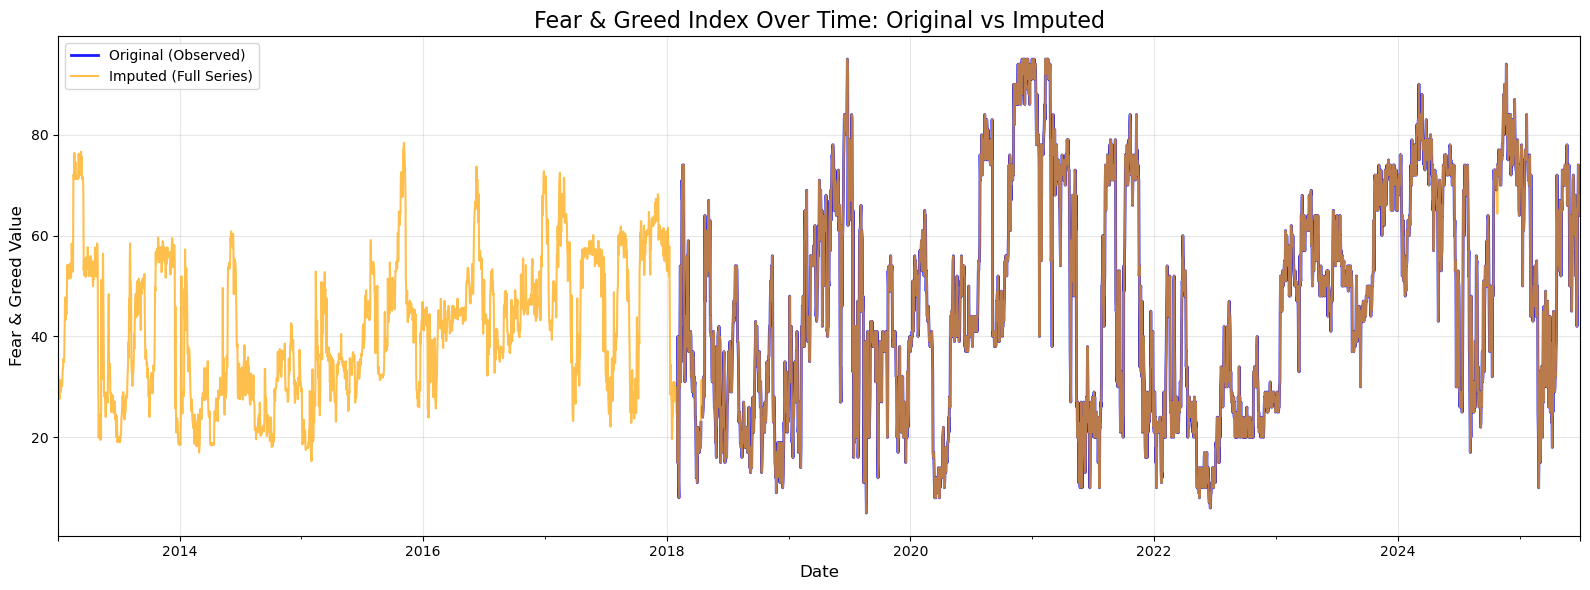

In [ ]:
plt.figure(figsize=(16,6))

df["date"] = pd.to_datetime(df["time"])
df = df.set_index("date")


# Plot original known data (blue)
df["fear_greed_original"].plot(
    label="Original (Observed)",
    alpha=0.9,
    linewidth=2,
    color="blue"
)

# Plot imputed full series (orange)
df["fear_greed_imputed"].plot(
    label="Imputed (Full Series)",
    alpha=0.7,
    linewidth=1.5,
    color="orange"
)

plt.title("Fear & Greed Index Over Time: Original vs Imputed", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Fear & Greed Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Notice that there's missing data throughout the time series, and our imputed points align with the surrounding original data

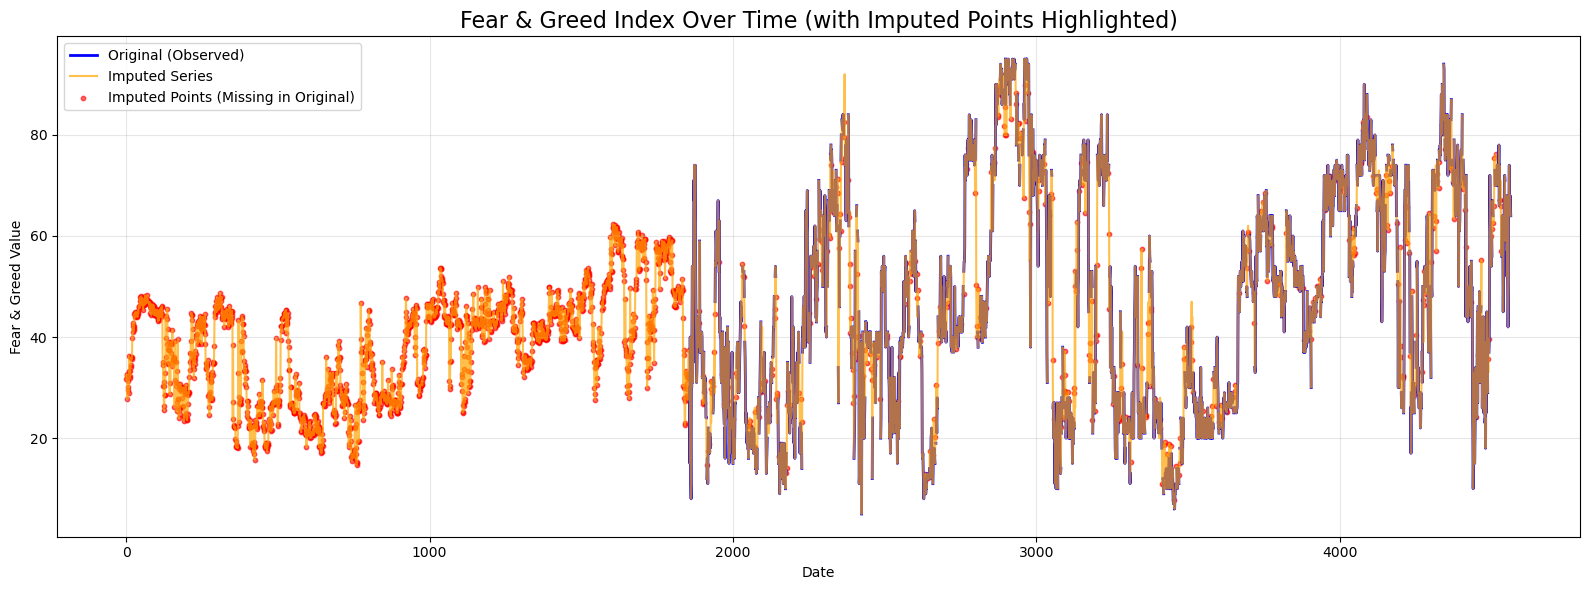

In [43]:
plt.figure(figsize=(16,6))

# Original observed values
df["fear_greed_original"].plot(
    label="Original (Observed)",
    color="blue",
    linewidth=2
)

# Full imputed series
df["fear_greed_imputed"].plot(
    label="Imputed Series",
    color="orange",
    linewidth=1.5,
    alpha=0.7
)

# Highlight only rows where original data was missing
missing_mask = df["fear_greed_original"].isna()

plt.scatter(
    df.index[missing_mask],
    df.loc[missing_mask, "fear_greed_imputed"],
    color="red",
    s=10,
    alpha=0.6,
    label="Imputed Points (Missing in Original)"
)

plt.title("Fear & Greed Index Over Time (with Imputed Points Highlighted)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Fear & Greed Value")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


How does the fear & greed data do following extreme regimes?

<Figure size 850x500 with 0 Axes>

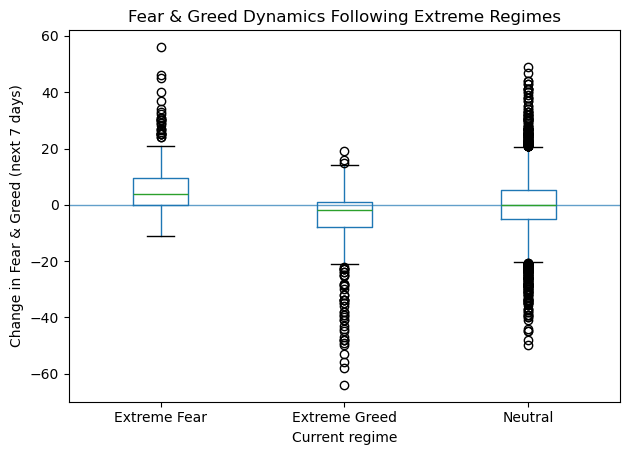

,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
Extreme Fear,458.0,5.934438,9.093979,-11.0,0.0,4.0,9.548125,56.0
Extreme Greed,462.0,-5.350406,12.427381,-64.0,-8.0,-2.0,1.000000,19.0
Neutral,3638.0,0.004400,11.144329,-50.0,-5.0,0.0,5.275625,49.0


In [ ]:
fg = df.copy()
fg["date"] = pd.to_datetime(fg["date"])
fg = fg.sort_values("date")

fg_col = "fear_greed_value_feargreed_imputed"

# Define extremes
q_lo = fg[fg_col].quantile(0.10)
q_hi = fg[fg_col].quantile(0.90)

fg["regime"] = "Neutral"
fg.loc[fg[fg_col] <= q_lo, "regime"] = "Extreme Fear"
fg.loc[fg[fg_col] >= q_hi, "regime"] = "Extreme Greed"

# 7-day forward change
fg["fg_next_week"] = fg[fg_col].shift(-7)
fg["delta_fg_1w"] = fg["fg_next_week"] - fg[fg_col]

plot_df = fg.dropna(subset=["delta_fg_1w"])


plt.figure(figsize=(8.5, 5))

plot_df.boxplot(
    column="delta_fg_1w",
    by="regime",
    grid=False
)

plt.axhline(0, linewidth=1, alpha=0.7)
plt.suptitle("")
plt.title("Fear & Greed Dynamics Following Extreme Regimes")
plt.ylabel("Change in Fear & Greed (next 7 days)")
plt.xlabel("Current regime")

plt.tight_layout()
plt.show()

plot_df.groupby("regime")["delta_fg_1w"].describe()

Composition of the fear & greed data every fear

<Figure size 1000x500 with 0 Axes>

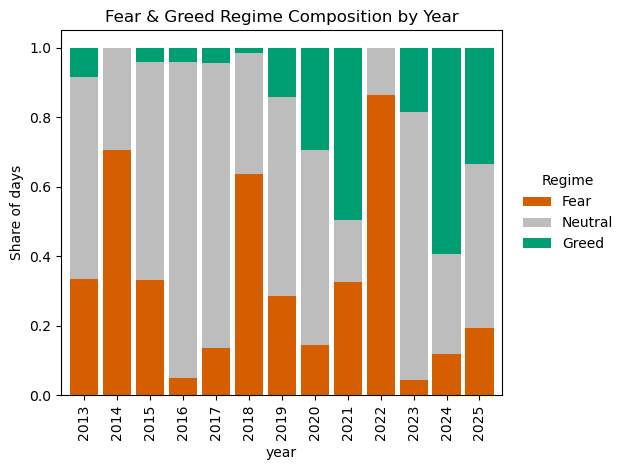

In [76]:
fg = df.copy()
fg["date"] = pd.to_datetime(fg["date"])

fg_col = "fear_greed_value_feargreed_imputed"

fg["regime"] = "Neutral"
fg.loc[fg[fg_col] <= 33, "regime"] = "Fear"
fg.loc[fg[fg_col] >= 66, "regime"] = "Greed"

fg["year"] = fg["date"].dt.year

regime_share = (
    fg.groupby(["year", "regime"])
      .size()
      .unstack(fill_value=0)
)

regime_share = regime_share.div(regime_share.sum(axis=1), axis=0)

plt.figure(figsize=(10, 5))

ax = regime_share[["Fear", "Neutral", "Greed"]].plot(
    kind="bar",
    stacked=True,
    color=["#D55E00", "#BDBDBD", "#009E73"],
    width=0.85
)

ax.set_ylabel("Share of days")
ax.set_title("Fear & Greed Regime Composition by Year")

# Move legend outside
ax.legend(
    title="Regime",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()
plt.show()



Overall distribution of the fear & greed data

<Axes: >

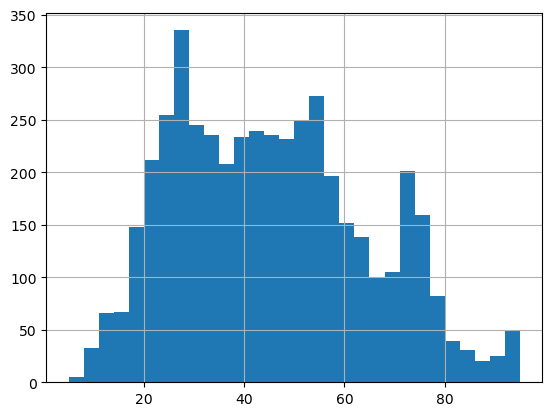

In [81]:
df["fear_greed_value_feargreed_imputed"].hist(bins=30)

Here's the final sentiment plot with each sentiment portion and BTC price overlaid on it

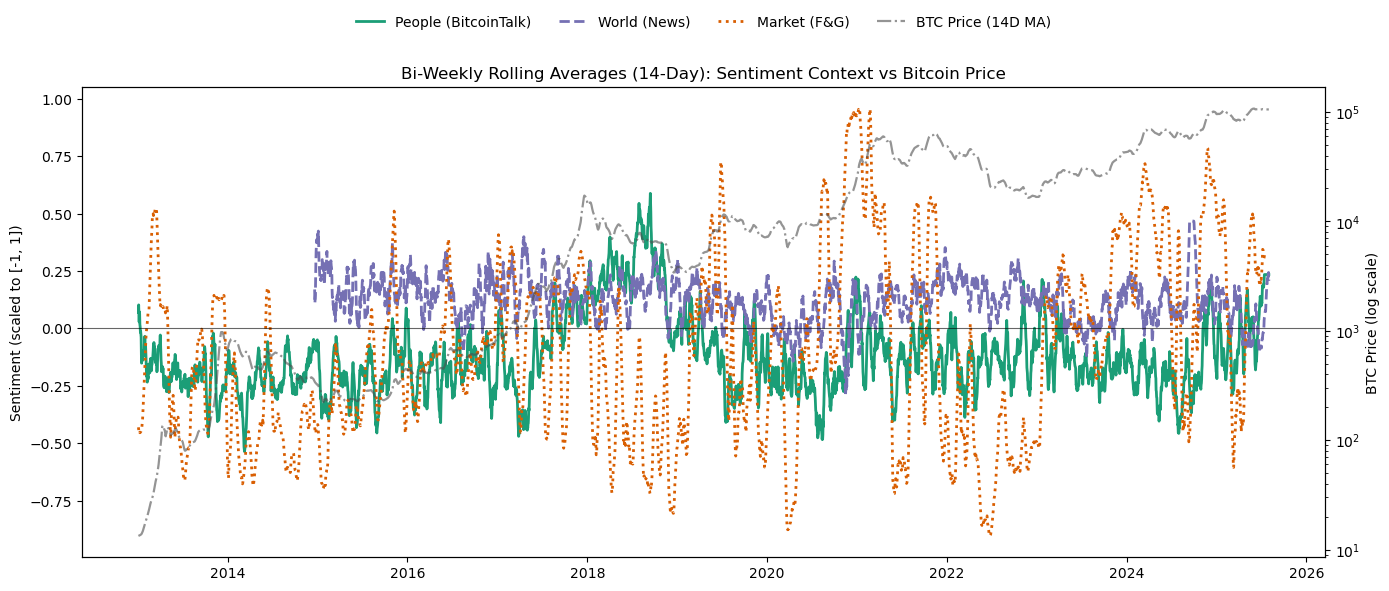

In [ ]:
# -----------------------------
# File paths (same folder)
# -----------------------------
people_path = "full_bitcoin_talk_sentiment.csv"
world_path  = "btc_news_sentiment_final.csv"
fg_path     = "f&g_imputed_2.csv"

PRICE_COL = "PriceUSD_coinmetrics"

# -----------------------------
# Helper
# -----------------------------
def scale_to_unit(s):
    s = pd.to_numeric(s, errors="coerce")
    return 2 * (s - s.min()) / (s.max() - s.min()) - 1

# -----------------------------
# PEOPLE (BitcoinTalk)
# -----------------------------
people = pd.read_csv(people_path)
people["date"] = pd.to_datetime(people["post_date"])

# Ensemble: 0.7 FinBERT + 0.3 Twitter/Roberta
people["people_sent"] = (
    0.3 * people["sent_finbert"] +
    0.7 * people["sent_twitter"]
)

people_daily = (
    people.groupby("date")["people_sent"]
    .mean()
    .pipe(scale_to_unit)
)

# -----------------------------
# WORLD (News)
# -----------------------------
world = pd.read_csv(world_path)
world["date"] = pd.to_datetime(world["date"])

# Use ensemble column directly
world_daily = (
    world.groupby("date")["ensemble"]
    .mean()
    .pipe(scale_to_unit)
)

# -----------------------------
# FEAR & GREED + BTC PRICE
# -----------------------------
fg = pd.read_csv(fg_path)
fg["date"] = pd.to_datetime(fg["date"])

fg_daily = (
    fg.groupby("date")[["fear_greed_value_feargreed_imputed", PRICE_COL]]
    .mean()
)

fg_daily["market_sent"] = scale_to_unit(
    fg_daily["fear_greed_value_feargreed_imputed"]
)

# -----------------------------
# MERGE
# -----------------------------
df = pd.concat(
    [
        people_daily.rename("People"),
        world_daily.rename("World"),
        fg_daily["market_sent"].rename("Market"),
        fg_daily[PRICE_COL].rename("BTC")
    ],
    axis=1
).ffill()

# -----------------------------
# PLOT
# -----------------------------
import matplotlib.pyplot as plt
import numpy as np

roll = 14  # weekly rolling window (7 days)

df_roll = df.copy()

# Rolling mean for sentiment
for c in ["People", "World", "Market"]:
    df_roll[c] = df_roll[c].rolling(roll, min_periods=3).mean()

# Rolling mean for BTC price (recommended)
df_roll["BTC"] = df_roll["BTC"].rolling(roll, min_periods=3).mean()

# --- Plot ---
plt.figure(figsize=(14, 6))

colors = {
    "People": "#1B9E77",
    "World":  "#7570B3",
    "Market": "#D95F02",
    "BTC":    "#4D4D4D"
}
linestyles = {
    "People": "-",
    "World":  "--",
    "Market": ":",
    "BTC":    "-."
}

# Sentiment lines
plt.plot(
    df_roll.index, df_roll["People"],
    label="People (BitcoinTalk)",
    color=colors["People"],
    linestyle=linestyles["People"],
    lw=2.0
)

plt.plot(
    df_roll.index, df_roll["World"],
    label="World (News)",
    color=colors["World"],
    linestyle=linestyles["World"],
    lw=2.0
)

plt.plot(
    df_roll.index, df_roll["Market"],
    label="Market (F&G)",
    color=colors["Market"],
    linestyle=linestyles["Market"],
    lw=2.0
)

plt.axhline(0, color="black", lw=0.8, alpha=0.6)
plt.ylabel("Sentiment (scaled to [-1, 1])")

# BTC price (secondary axis)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(
    df_roll.index, df_roll["BTC"],
    label="BTC Price (14D MA)",
    color=colors["BTC"],
    linestyle=linestyles["BTC"],
    lw=1.6,
    alpha=0.6
)
ax2.set_yscale("log")
ax2.set_ylabel("BTC Price (log scale)")

# Legend outside
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.18),
    ncol=4,
    frameon=False
)

plt.title("Bi-Weekly Rolling Averages (14-Day): Sentiment Context vs Bitcoin Price")
plt.tight_layout()
plt.show()